In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import model_selection

from sklearn.metrics import confusion_matrix 

import seaborn as sn
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("./dataset/tirages.csv", index_col=[0])
df.shape

(7047, 147)

In [3]:
df.drop(['index'], axis=1, inplace=True)

In [4]:
df.head(5)

,num0,num1,num2,num3,num4,chance,f_1,fc_1,f_2,fc_2,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,31,15,33,27,36,34,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
1,10,26,42,1,4,31,0,2,2,2,...,0,0,0,1,1,0,0,0,0,0
2,44,16,47,10,15,27,1,3,3,3,...,0,0,0,0,0,1,0,0,0,0
3,2,3,35,13,1,49,0,4,0,4,...,0,0,0,0,1,0,0,0,0,1
4,30,22,11,9,23,49,1,5,1,5,...,0,0,0,0,0,0,1,0,0,1


In [5]:
#data = df.iloc[:,4:13]
target = df[['num0']] # , 'num1', 'num2', 'num3', 'num4', 'chance'

In [6]:
target.head()

,num0
0,31
1,10
2,44
3,2
4,30


In [7]:
#data = df.iloc[:,6:]
data = df.drop(['num0'], axis = 1)

In [8]:
data.head()

,num1,num2,num3,num4,chance,f_1,fc_1,f_2,fc_2,f_3,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,15,33,27,36,34,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
1,26,42,1,4,31,0,2,2,2,2,...,0,0,0,1,1,0,0,0,0,0
2,16,47,10,15,27,1,3,3,3,3,...,0,0,0,0,0,1,0,0,0,0
3,3,35,13,1,49,0,4,0,4,0,...,0,0,0,0,1,0,0,0,0,1
4,22,11,9,23,49,1,5,1,5,1,...,0,0,0,0,0,0,1,0,0,1


In [9]:
 X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=66)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6342, 145) (705, 145) (6342, 1) (705, 1)


#### Standardisation

In [11]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

In [12]:
print(X_train_scaled.mean(axis=0))
 
print(X_train_scaled.std(axis=0))

[ 1.24361784e-16  1.00833879e-17  1.36685925e-16  6.94633390e-17
 -2.88496932e-17 -1.00833879e-16 -2.07269641e-17 -7.61855977e-17
  2.01667758e-17 -7.39448448e-17  1.01674162e-16  1.68056465e-17
 -2.63288462e-17 -6.05003275e-17  2.35279052e-17  7.03036214e-17
  5.60188218e-17  7.39448448e-17  6.49818333e-17  7.89865387e-17
  6.49818333e-17  2.32478110e-17 -1.00833879e-16  1.48449878e-17
  8.54287033e-17 -1.12037644e-18  4.59354339e-17 -6.44216451e-17
 -2.91297873e-17  1.17639526e-17  5.48984454e-17 -2.52084698e-17
  1.68056465e-17 -1.09796891e-16 -1.28843290e-17 -6.94633390e-17
  3.92131753e-18 -8.85097385e-17  4.14539281e-17 -1.93264935e-17
  9.52319971e-18  2.57686580e-17 -2.35279052e-17 -4.36946810e-17
  1.12037644e-18 -1.12037644e-17 -3.58520460e-17  3.80927988e-17
  3.13705402e-17 -2.29677169e-17  3.86529870e-17  3.58520460e-17
 -3.19307284e-17 -1.17639526e-17  1.17639526e-17  5.82595747e-17
  2.91297873e-17  2.91297873e-17  0.00000000e+00  8.96301149e-18
  8.96301149e-18 -2.63288

In [13]:
X_test_scaled = scaler.transform(X_test)
 
print(X_test_scaled.mean(axis=0))
# [ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
#  -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
 
print(X_test_scaled.std(axis=0))

[ 0.04074532 -0.02443206 -0.00452855 -0.01146947 -0.02453389 -0.04763789
 -0.029904    0.05555389 -0.07368607 -0.07004976 -0.02944018 -0.02513349
 -0.04044533  0.04699041 -0.01527325 -0.02083252 -0.04873175 -0.01894258
 -0.054122   -0.02846826 -0.01171551  0.06258809 -0.03530069 -0.04252187
 -0.02896122 -0.03321338  0.07104967  0.08686663  0.0708969  -0.04142218
  0.06977228 -0.00053699  0.07470801  0.04757986  0.071311   -0.02374176
  0.0717408  -0.00038843  0.06783907 -0.06729183  0.07395501  0.08245427
  0.0744153   0.02753729  0.07135644  0.01114666  0.07196201 -0.15380442
  0.06995508  0.02246994  0.07357695 -0.00152856  0.0706554  -0.01876174
  0.06935342  0.09880929  0.06677908  0.05299455  0.07301105  0.0005841
  0.06904129  0.01487776  0.0705159   0.12926397  0.06764952 -0.02478962
  0.07228125  0.0283917   0.07254183  0.05735814  0.06834694  0.02062835
  0.07032652  0.02109779  0.06813139  0.00091476  0.07235142  0.02012032
  0.06878008  0.07147175  0.07084672  0.00245119  0.

les variables normalisées dans l'échantillon de test ne sont pas parfaitement centrées en zéro et de variance égale à 1, car nous transformons l'ensemble de test en utilisant les moyennes de l'ensemble d'apprentissage, et non pas de l'ensemble de test lui-même.

### SVM

In [14]:
svm_clf = svm.SVC(gamma=0.01,  kernel='poly')
svm_clf.fit(X_train_scaled, y_train.values.ravel())

SVC(gamma=0.01, kernel='poly')

In [15]:
y_pred = svm_clf.predict(X_test_scaled)
pd.crosstab(y_test['num0'].to_numpy(), y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Classe réelle,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,6,2,4,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,2,2,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,3,1,2,0,1,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,3,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,2,1,2,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,4,4,0,4,4,1,2,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1,3,4,1,5,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,3,1,0,1,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,2,3,1,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
svm_cm = confusion_matrix(y_test,y_pred)

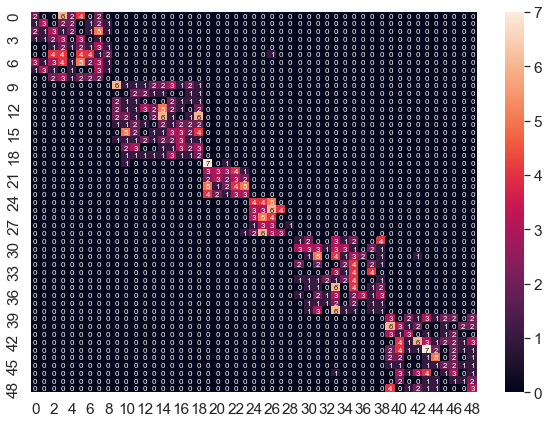

In [17]:
df_cm = pd.DataFrame(svm_cm, range(49), range(49))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}) # font size

plt.show()

In [18]:
parametres = {'C':[0.1,1,10],'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}

In [19]:
grid_clf = model_selection.GridSearchCV(estimator=svm_clf, param_grid=parametres)

In [20]:
grille = grid_clf.fit(X_train_scaled,y_train.values.ravel())

In [21]:
print(grid_clf.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}


In [22]:
#Prédiction des features test et création de la matrice de confusion
y_pred = grid_clf.predict(X_test_scaled)
pd.crosstab(y_test['num0'].to_numpy(), y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Classe réelle,,,,,,,,,,,,,,,,,,,,,
1,9,0,1,2,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,7,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,7,1,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,5,1,1,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,5,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,4,0,0,2,5,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
7,3,2,3,1,3,1,7,2,1,0,...,0,0,0,0,0,0,0,0,0,0
8,4,1,0,0,0,3,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,2,1,2,1,0,0,2,4,0,...,0,0,0,0,0,0,0,0,0,0


#### Courbe d'apprentissage du modèle

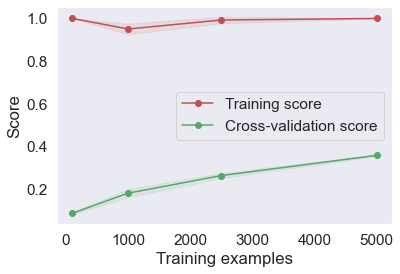

In [23]:
from sklearn.model_selection import learning_curve

%matplotlib inline 

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), X_train_scaled, y_train.values.ravel(), train_sizes=[50, 100, 1000, 2500, 5000], cv=5)

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes=[50, 100, 1000, 2500, 5000]

train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, X_train_scaled, y_train.values.ravel(), n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

Il faudrait plus de tirages pour voir si ça continue à monter

Le modèle a été entrainé juqu'au mercredi 28 septembre 2022

Tirage suivant, le 01 octobre 2022<br>
<b>07 08 26 35 36 02</b>

In [25]:
y_pred = svm_clf.predict(scaler.transform(data))

In [26]:
y_pred

array([31, 10, 44, ..., 25, 29, 12], dtype=int64)